In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

# Blood Bowl Luck Assessment Method
The game of "Blood Bowl" contains significant luck element, therefore it often raises question of assessment said luck. In this work I try to develop a method for estimating coaches' luck, based on their dice rolls.

## Input Data
"Blood Bowl" is a game with a lot of dice rolling. Throughout the match each coach makes over a hundred individual independent dice rolls with variable success, failure and neutral outcome chances. For starting analysis, we have to gather all these rolls for both coaches; their chances, outcomes and amounts. This can be done manually, automation of this process is possible, but far from my competention. 
  
As the result, we get a list of individual dice rolls for each coach, looking like: [[chance_1, weight_1], [chance_2, weight_2], ... [chance_n, weight_n]], where chance - probability of individual roll, weight - whether its outcome was positive (1), neutral (0) or negative (-1).

Sum of possible weights for each individual roll should be 0, e.g. you can't have a roll without positive or negative outcome (if you make such rolls - don't include them into list, they don't affect your luck anyway).

Sum of possible probabilities for each individual roll should be 1, by definition of probability.

## Working Hypothesis
For each roll we add new metric $luck = \frac{w\,e\,i\,g\,h\,t}{c\,h\,a\,n\,c\,e}$  
It has several useful properties:
<ul>
    <li>sign, showing whether outcome was positive or negative;</li>
    <li>its absolute value is greater, the more unlikely the dice roll was;</li>
    <li>expected sum of luck for "fair" dice rolls is 0.</li>
</ul>
Let's prove the last statement. Imagine us rolling dice n times with chance of positive outcome p, chance of negative outcome q, chance of neutral outcome (1-p-q). Then with "fair" dice you expect to get pozitive outcome $np$ times, neutral outcome $n(1-p-q)$ times and negative outcome $nq$ times. Your luck sum would be  
$\frac{1}{p}np+\frac{0}{1-p-q}n(1-p-q)+\frac{-1}{q}nq = n - n = 0$

So should be sum of luck with "fair" luck distribution for the whole match (later "cumulative luck", CL). If you get more positive outcomes, than expected, your CL will be above 0. If you get more negative - below 0.


## Luck Comparision
For each coach you get a list of luck scores of his rolls, looking like [[luck_1], [luck_2], ... [luck_n]]. Count each coaches cumulative luck as  
$CL = \sum_{i=1}^n luck_i$  

You get 2 numbers (likely different from 0 and from each other). Now let's try to estimate significance of their differences statistically.  

I suggest to take as the null hypothesis equality of coaches' real CLs, then evaluate its p-value by comparing confidence intervals for them (using this [article](https://www.researchgate.net/publication/7994369_Inference_by_Eye_Confidence_Intervals_and_How_to_Read_Pictures_of_Data)), build with bootstrap method.  

Now we are able to answer following questions:
<ul>
    <li>whether each coach's CL significantly differs from expected (0);</li>
    <li>whether coaches' CL significantly differ from each other.</li>
</ul>
That gives us statistic-based method for assessing coaches' luck in "Blood Bowl" match.

## Example
Let's input some collected data from test match

In [2]:
coach_1 = 'coach_1'
coach_2 = 'coach_2'

In [3]:
index_1 = pd.MultiIndex.from_product(
    [
        [
            '1D6_4+',
            'kickoff',
            '2D_0_vs_Bl',
            '2D6_9+',
            '1D6_2+',
            '2D_Bl_vs_0',
            '2D6_10+',
            '2D_Bl_or_W_vs_Bl',
            '1D_0_vs_0_or_Bl',
            '1D6_3+',
            '2D6_8+',
            '-2D_push',
            '1D6_6+',
            '1D_Bl_vs_0'
        ], 
        ['success', 'neutral', 'failure']
    ], 
    names=['action', 'result']
)

index_2 = pd.MultiIndex.from_product(
    [
        [
            '1D6_4+',
            'kickoff',
            '1D6_2+',
            '2D_Bl_vs_0',
            '2D6_8+',
            '2D6_7+',
            '3D_0_vs_0',
            '1D6_3+',
            '2D_0_vs_0',
            '3D_0_vs_Dodge',
            '1D6_6+',
            '2D_0_vs_Dodge',
            '2D_Bl_vs_Dodge',
            '2D6_6+',
            '2D_Bl_vs_Blodge',
            '1D_0_vs_0_or_Bl'
        ], 
        ['success', 'neutral', 'failure']
    ], 
    names=['action', 'result']
)

In [4]:
df_coach_1 = pd.DataFrame(
    data=[
        [1/2, 1, 6], 
        [0, 0, 0], 
        [1/2, -1, 10],
        [6/36, 1, 0],
        [22/36, 0, 2],
        [8/36, -1, 0],
        [20/36, 1, 4],
        [12/36, 0, 0],
        [4/36, -1, 0],
        [10/36, 1, 3],
        [0, 0, 0],
        [26/36, -1, 4],
        [5/6, 1, 53],
        [0, 0, 0],
        [1/6, -1, 13],
        [27/36, 1, 2],
        [8/36, 0, 1],
        [1/36, -1, 0],
        [1/6, 1, 0],
        [0, 0, 0],
        [5/6, -1, 8],
        [20/36, 1, 3],
        [15/36, 0, 4],
        [1/36, -1, 0],
        [1/3, 1, 2],
        [1/3, 0, 0],
        [1/3, -1, 2],
        [4/6, 1, 9],
        [0, 0, 0],
        [2/6, -1, 2],
        [15/36, 1, 2],
        [0, 0, 0],
        [21/36, -1, 2],
        [16/36, 1, 1],
        [0, 0, 0],
        [20/36, -1, 0],
        [1/6, 1, 0],
        [0, 0, 0],
        [5/6, -1, 1],
        [3/6, 1, 3],
        [2/6, 0, 1],
        [1/6, -1, 1] 
    ], 
    index=index_1, 
    columns=['chance', 'weight', 'amount']
)

df_coach_2 = pd.DataFrame(
    data=[
        [1/2, 1, 8], 
        [0, 0, 0], 
        [1/2, -1, 7],
        [6/36, 1, 0],
        [22/36, 0, 1],
        [8/36, -1, 0],
        [5/6, 1, 16],
        [0, 0, 0],
        [1/6, -1, 4],
        [27/36, 1, 12],
        [8/36, 0, 5],
        [1/36, -1, 0],
        [15/36, 1, 16],
        [0, 0, 0],
        [21/36, -1, 18],
        [21/36, 1, 6],
        [0, 0, 0],
        [15/36, -1, 8],
        [152/216, 1, 2],
        [56/216, 0, 0],
        [8/216, -1, 0],
        [4/6, 1, 3],
        [0, 0, 0],
        [2/6, -1, 1],
        [20/36, 1, 6],
        [12/36, 0, 1],
        [4/36, -1, 1],
        [91/216, 1, 0],
        [117/216, 0, 1],
        [8/216, -1, 0],
        [1/6, 1, 3],
        [0, 0, 0],
        [5/6, -1, 2],
        [11/36, 1, 0],
        [21/36, 0, 1],
        [4/36, -1, 0],
        [20/36, 1, 4],
        [15/36, 0, 0],
        [1/36, -1, 0],
        [26/36, 1, 1],
        [0, 0, 0],
        [10/36, -1, 0],
        [11/36, 1, 0],
        [24/36, 0, 2],
        [1/36, -1, 0],
        [2/6, 1, 0],
        [2/6, 0, 1],
        [2/6, -1, 0]   
    ], 
    index=index_2, 
    columns=['chance', 'weight', 'amount']
)

Let's check our data.

In [5]:
df_coach_1

chance  weight  amount
action           result                           
1D6_4+           success  0.500000       1       6
                 neutral  0.000000       0       0
                 failure  0.500000      -1      10
kickoff          success  0.166667       1       0
                 neutral  0.611111       0       2
                 failure  0.222222      -1       0
2D_0_vs_Bl       success  0.555556       1       4
                 neutral  0.333333       0       0
                 failure  0.111111      -1       0
2D6_9+           success  0.277778       1       3
                 neutral  0.000000       0       0
                 failure  0.722222      -1       4
1D6_2+           success  0.833333       1      53
                 neutral  0.000000       0       0
                 failure  0.166667      -1      13
2D_Bl_vs_0       success  0.750000       1       2
                 neutral  0.222222       0       1
                 failure  0.027778      -1       0
2D6_10+          success  0.166667       1       0
                 neutral  0.000000       0       0
                 failure  0.833333      -1       8
2D_Bl_or_W_vs_Bl success  0.555556       1       3
                 neutral  0.416667       0       4
                 failure  0.027778      -1       0
1D_0_vs_0_or_Bl  success  0.333333       1       2
                 neutral  0.333333       0       0
                 failure  0.333333      -1       2
1D6_3+           success  0.666667       1       9
                 neutral  0.000000       0       0
                 failure  0.333333      -1       2
2D6_8+           success  0.416667       1       2
                 neutral  0.000000       0       0
                 failure  0.583333      -1       2
-2D_push         success  0.444444       1       1
                 neutral  0.000000       0       0
                 failure  0.555556      -1       0
1D6_6+           success  0.166667       1       0
                 neutral  0.000000       0       0
                 failure  0.833333      -1       1
1D_Bl_vs_0       success  0.500000       1       3
                 neutral  0.333333       0       1
                 failure  0.166667      -1       1

In [6]:
df_coach_2

chance  weight  amount
action          result                           
1D6_4+          success  0.500000       1       8
                neutral  0.000000       0       0
                failure  0.500000      -1       7
kickoff         success  0.166667       1       0
                neutral  0.611111       0       1
                failure  0.222222      -1       0
1D6_2+          success  0.833333       1      16
                neutral  0.000000       0       0
                failure  0.166667      -1       4
2D_Bl_vs_0      success  0.750000       1      12
                neutral  0.222222       0       5
                failure  0.027778      -1       0
2D6_8+          success  0.416667       1      16
                neutral  0.000000       0       0
                failure  0.583333      -1      18
2D6_7+          success  0.583333       1       6
                neutral  0.000000       0       0
                failure  0.416667      -1       8
3D_0_vs_0       success  0.703704       1       2
                neutral  0.259259       0       0
                failure  0.037037      -1       0
1D6_3+          success  0.666667       1       3
                neutral  0.000000       0       0
                failure  0.333333      -1       1
2D_0_vs_0       success  0.555556       1       6
                neutral  0.333333       0       1
                failure  0.111111      -1       1
3D_0_vs_Dodge   success  0.421296       1       0
                neutral  0.541667       0       1
                failure  0.037037      -1       0
1D6_6+          success  0.166667       1       3
                neutral  0.000000       0       0
                failure  0.833333      -1       2
2D_0_vs_Dodge   success  0.305556       1       0
                neutral  0.583333       0       1
                failure  0.111111      -1       0
2D_Bl_vs_Dodge  success  0.555556       1       4
                neutral  0.416667       0       0
                failure  0.027778      -1       0
2D6_6+          success  0.722222       1       1
                neutral  0.000000       0       0
                failure  0.277778      -1       0
2D_Bl_vs_Blodge success  0.305556       1       0
                neutral  0.666667       0       2
                failure  0.027778      -1       0
1D_0_vs_0_or_Bl success  0.333333       1       0
                neutral  0.333333       0       1
                failure  0.333333      -1       0

Let's add "luck" metric and transform our data into luck lists.

In [7]:
df_coach_1['luck'] = (df_coach_1.weight / df_coach_1.chance)
df_coach_2['luck'] = (df_coach_2.weight / df_coach_2.chance)

In [8]:
coach_1_luck_list = []
for i in df_coach_1.itertuples():       # take each row in our data
   for j in range(i.amount):
       coach_1_luck_list.append(i.luck) # append luck score to luck list as many times, as many rolls with this luck we had
       
coach_2_luck_list = []
for i in df_coach_2.itertuples():       # take each row in our data
   for j in range(i.amount):
       coach_2_luck_list.append(i.luck) # append as many times, as many rolls with this luck we had

Let's count cumulative luck.

In [9]:
coach_1_CL = sum(coach_1_luck_list)
coach_2_CL = sum(coach_2_luck_list)
print(f'Cumulative luck of {coach_1}: {coach_1_CL:.0f}.')
print(f'Cumulative luck of {coach_2}: {coach_2_CL:.0f}.')

Cumulative luck of coach_1: -2.
Cumulative luck of coach_2: 42.


Let's build confidence intervals for CL using bootstrap.

In [10]:
def bootstrap_sum(lucklist, n=10000, confidence_level=0.95):
    sum_luck = []
    for i in range(n):
        sample = pd.Series(lucklist).sample(frac=1, replace=True)
        sample_sum = sample.sum()
        sum_luck.append(sample_sum)
    ci_low = pd.Series(sum_luck).quantile((1 - confidence_level)/2)
    ci_high = pd.Series(sum_luck).quantile(1 - (1 - confidence_level)/2)
    return ci_low, ci_high

In [11]:
coach_1_ci_low, coach_1_ci_high = bootstrap_sum(coach_1_luck_list, n=50000)
coach_2_ci_low, coach_2_ci_high = bootstrap_sum(coach_2_luck_list, n=50000)

In [12]:
if coach_1_CL < coach_2_CL:
    top_margin = coach_1_ci_high
    low_margin = coach_2_ci_low
    top_CL = coach_2_CL
    low_CL = coach_1_CL
else:
    top_margin = coach_2_ci_high
    low_margin = coach_1_ci_low
    top_CL = coach_1_CL
    low_CL = coach_2_CL

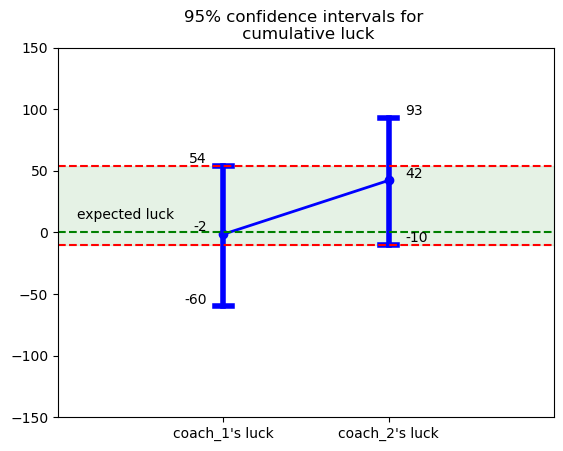

<Figure size 640x480 with 0 Axes>

In [13]:
plt.xlim(0, 3)
plt.ylim(round(min(coach_2_ci_low, coach_1_ci_low), -2)-50, round(max(coach_2_ci_high, coach_1_ci_high), -2)+50)

plt.plot([1, 1], [coach_1_ci_low, coach_1_ci_high], color='b', linewidth=4)
plt.plot([2, 2], [coach_2_ci_low, coach_2_ci_high], color='b', linewidth=4)
plt.plot([1, 2], [coach_1_CL , coach_2_CL ], color='b',  marker='o', linewidth=2)
plt.plot([1-0.05, 1+0.05], [coach_1_ci_high, coach_1_ci_high], color='b', linewidth=4)
plt.plot([1-0.05, 1+0.05], [coach_1_ci_low, coach_1_ci_low], color='b', linewidth=4)
plt.plot([2-0.05, 2+0.05], [coach_2_ci_low, coach_2_ci_low], color='b', linewidth=4)
plt.plot([2-0.05, 2+0.05], [coach_2_ci_high, coach_2_ci_high], color='b', linewidth=4)

plt.text(1-0.1, coach_1_ci_low, f'{coach_1_ci_low:.0f}', ha='right', va='bottom')
plt.text(1-0.1, coach_1_ci_high, f'{coach_1_ci_high:.0f}', ha='right', va='bottom')
plt.text(2+0.1, coach_2_ci_low,  f'{coach_2_ci_low:.0f}', ha='left', va='bottom')
plt.text(2+0.1, coach_2_ci_high,  f'{coach_2_ci_high:.0f}', ha='left', va='bottom')
plt.text(2+0.1, coach_2_CL,  f'{coach_2_CL:.0f}', ha='left', va='bottom')
plt.text(1-0.1, coach_1_CL,  f'{coach_1_CL:.0f}', ha='right', va='bottom')
plt.text(0.7, 20, 'expected luck', ha='right', va='top')

plt.axhline(y=top_margin, color='r', linestyle='--')
plt.axhline(y=low_margin, color='r', linestyle='--')

if top_margin > low_margin:
    plt.fill_betweenx(y=[top_margin, low_margin], x1=0, x2=5, color='green', alpha=0.1)
else:
    plt.fill_betweenx(y=[top_margin, low_margin], x1=0, x2=5, color='red', alpha=0.1)
    
plt.axhline(y=0, color='g', linestyle='--')

plt.xticks([1, 2], [f"{coach_1}'s luck", f"{coach_2}'s luck"])
plt.title("95% confidence intervals for \n cumulative luck")

#plt.savefig('95_ci_CL.jpeg') # uncomment this line, if you want to save the picture
plt.show()
sns.despine()

In [14]:
average_margin = ((top_margin - low_CL) + (top_CL - low_margin)) / 2
overlap = (top_margin - low_margin) / average_margin

With recommendations from [the article](https://www.researchgate.net/publication/7994369_Inference_by_Eye_Confidence_Intervals_and_How_to_Read_Pictures_of_Data) let's estimate p-value by evaluating overlap of our confidence intervals. As it says: "Rule of Eye 4: For a comparison of two independent means, p <.05 when the overlap of the 95% CIs is no more than about half the average margin of error, that is, when proportion overlap is about .50 or less."

In [15]:
if overlap > 0.5:
    print(f"95% CI overlap is {overlap:.2f}, more than 0.5;\nassume p-value > 0.05 and no significant difference between coaches' CL.")
else:
    print(f"95% CI overlap is{overlap:.2f}, less than 0.5;\nassume p-value <= 0.05 and significant difference between coaches' CL.")

95% CI overlap is 1.19, more than 0.5;
assume p-value > 0.05 and no significant difference between coaches' CL.


As we can see, in this case both coaches' 95% confidence intervals for cumulative luck heavily overlap each other, and both include theoretically expected CL value (0). Here we can't say, that one coach was luckier, than another, or luckier, than theoretically expected. 